In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

In [62]:
iris = load_iris()
X_iris = pd.DataFrame(iris.data, 
                      columns = ['SepalL','SepalW','PetalL','PetalW'])
y_iris = pd.DataFrame(iris.target, columns = ['Name'])

### 1. Decision Tree: Classification

Accuracy rate = 0.97368
 
[[12  0  0]
 [ 0  8  1]
 [ 0  0 17]]
 


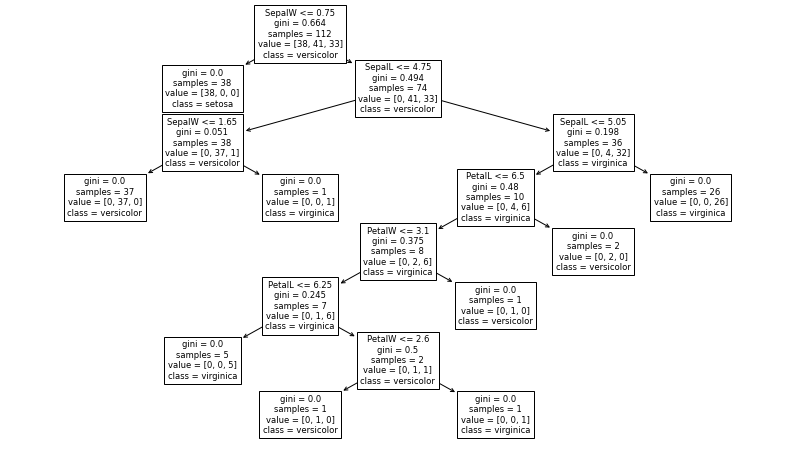

In [67]:
#default test data size: 25%
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris)

#Training with DevisionTree algorithm
irisDT = tree.DecisionTreeClassifier().fit(X_train, y_train)
class_prediction = irisDT.predict(X_test)

#Calculating accuracy
ac_score = metrics.accuracy_score(y_test, class_prediction)
print(f'Accuracy rate = {ac_score:.5f}')
print(' ')

confusion = metrics.confusion_matrix(y_true=y_test, y_pred=class_prediction)
print(confusion)
print(' ')


plt.figure(figsize = (14,8))
tree.plot_tree(irisDT.fit(X_train, y_train), 
               feature_names = ['PetalL','PetalW','SepalL','SepalW'],
              class_names = {0: 'setosa', 1: 'versicolor', 2: "virginica"})
plt.show()


#참고링크
#https://dschloe.github.io/python/python_edu/04_machinelearning/chapter_4_5_understanding_tree/

### 2. Random Forest

In [28]:
# Classifying mushrooms
mshrm = pd.read_csv(r'C:\Users\Yunseok Choi\mushrooms.csv', header = 0)
# first column : p or e (labels), 22 features
print(mshrm.shape)
print(mshrm.head()) # p: poision, e: no poison

#the ord() function in python accepts a string of length 1 as an argument and returns the unicode.
#code point representation of the passed argument
ord('d')

#learning the iterrows() of pandas: loop through each row of dataframe.
string_series = pd.DataFrame([['r','a','n','d','o','m'],['f','o','r','e','s','t']])
for i, value in string_series.iterrows():
    for j in value:
        print(f'{i}: {ord(j)}', end=' ') #Return the Unicode code point for a one-character string.

(8124, 23)
  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w 

In [31]:
#mushroom data preprocessing: converting single strings into numbers
label = []
data = []

for row_index, row in mshrm.iterrows():
    label.append(row.iloc[0])
    row_data = []
    for v in row.iloc[1:]:
        row_data.append(ord(v))
    data.append(row_data)

y_data = pd.Series(label)
X_data = pd.DataFrame(data)
print(y_data.shape, X_data.shape)
#y_data.head()
X_data.head()

(8124,) (8124, 22)


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,120,115,110,116,112,102,99,110,107,101,...,115,119,119,112,119,111,112,107,115,117
1,120,115,121,116,97,102,99,98,107,101,...,115,119,119,112,119,111,112,110,110,103
2,98,115,119,116,108,102,99,98,110,101,...,115,119,119,112,119,111,112,110,110,109
3,120,121,119,116,112,102,99,110,110,101,...,115,119,119,112,119,111,112,107,115,117
4,120,115,103,102,110,102,119,98,107,116,...,115,119,119,112,119,111,101,110,97,103


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data)

#Learning
mshrmRFC = RandomForestClassifier().fit(X_train, y_train)

#Prediction
predict = mshrmRFC.predict(X_test)

#Accuracy
ac_score = metrics.accuracy_score(y_test, predict)
print(ac_score)
confusion = metrics.confusion_matrix(y_true = y_test, y_pred = predict)
print(confusion)
cl_report = metrics.classification_report(y_test, predict)
print(cl_report)
print(mshrmRFC.feature_importances_)

1.0
[[1039    0]
 [   0  992]]
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1039
           p       1.00      1.00      1.00       992

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

[0.00514893 0.00847928 0.01434334 0.04674446 0.16977414 0.00205829
 0.04042974 0.12262321 0.10615809 0.02603222 0.06334223 0.04862933
 0.05028175 0.01646503 0.011053   0.         0.00426273 0.01577581
 0.07991954 0.07687436 0.06329065 0.02831388]
